# Классификация

На первом нашем занятии мы разбирали и решали задачу регрессии - то есть задачу восстановления зависимости. Однако, на практике далеко не всегда требуется восстановить полную зависимость. Иногда достаточно определить то, к какому "типу" или "классу" относится объект. Задачи такого рода называются задачами классификации.

Классификация — это задача машинного обучения с учителем, цель которой заключается в разделении объектов на заранее заданные классы.

**Математическая постановка задачи:**

Пусть дан набор данных $\{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}$, где:
- $x_i \in R^d$ вектор признаков $i$-го объекта;
- $y_i \in {1,2,...,K}$ метка класса, соответствующая $i$-ому объекту;
- $d$ количество признаков;
- $n$ - количество объектов в обучающем наборе;
- $K$ - количество классов.

Цель классификации: Построить функцию $f(x)$, которая сопоставляет каждому объекту с признаками $x_i$ его класс $y_i$. Функция $f(x)$ называется моделью классификации.

**Типы классификации:**
1. Бинарная классификация

Задача состоит в разделении объектов на два класса:
- $y \in \{0,1\}$ или $y \in \{-1,1\}$.
- Примеры: фильтрация спама (спам/не спам), обнаружение мошенничества (мошенничество/не мошенничество), определение пола человека (мужчина/женщина).

2. Многоклассовая классификация

Объекты разделяются на более чем два класса:
- $y \in \{1,2,...,K\}$, где $K > 2$ - количество классов.
- Примеры: классификация изображений по категориям (животные, транспорт, здания), определение языков текста.


Простейшим случаем классификации является **бинарная классификация**, то есть случай, когда у нас имеется два класса. Ключевое отличие от линейной регрессии состоит в том, что пространство ответов состоит из двух элементов, например, возьмём , где  и  означают принадлежность к первому или второму классу, соответственно.

**Обычно, в классификации один класс называют положительным (1) и отрицательным (0 или -1).**

Например, для задачи распознавания спам-писем эти значения могли бы занчить: -1 означало, что письмо не является спамом, а 1 - что является.

## Логистическая регрессия

**Логистическая регрессия - простейщий вид бинарной классификации, это линейная модель.**

Регрессией она называется потому что выводится из линейной регресии (не путайте эти два алгоритма для разных типов задач! но основаны на одном и том же линейном уравнении!).

Т.е. в данном случае сама модель будет представлена в виде все той же функции, которую мы немного преобразуем:

$$
f(x) = y = w_1*x_1 + w_2*x_2 + ... + w_n*x_n + w_0 = \sum^{d}_{i=0} w_i*x_i
$$

Или в векторном виде:

$$
f(x) = \left ( \left \langle w,x \right \rangle \right )
$$

Только в случаи классификации нам нужно не само значение этого уравнения, а его знак:

$$ f(x) = \text{sign} \left ( \sum^{d}_{i=0}w_{i}x^{i} \right ) = \text{sign} \left ( \left \langle w,x \right \rangle \right ).$$

Множество точек  образует гиперплоскость в пространстве признаков и делит его на две части. Объекты, расположенные по разные стороны от нее, относятся к разным классам. Гиперплоскость - это обобщённое название плоскости для многомерного пространство (в случае двумерного пространство плоскость - это прямая, в трёхмерном - плоскость).

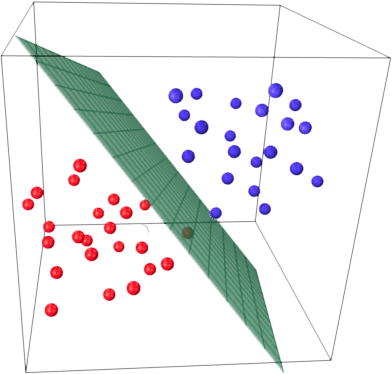

Функция знака $$ f(x) = \text{sign} \left ( \sum^{d}_{i=0}w_{i}x^{i} \right ) = \text{sign} \left ( \left \langle w,x \right \rangle \right ).$$ просто дает два значения: $+1$ или $−1$ (или $1$ и $0$ в бинарной классификации), но она не говорит, насколько уверена модель в своем решении.

К тому же, функция знака недифференцируема в точке 0, а в остальных местах её градиент равен 0, что делает невозможным обучение с помощью градиентного спуска.

Пусть в каждой точке пространства объектов $\mathbb{X}$ задана вероятность того, что объект $x$ будет принадлежать к классу «+1» $P(y=1|x)$. Она будет принимать значения от 0 до 1 - наша задача её предсказывать. Решение этой задачи регрессионным методом выглядит так: $$f(x)=\left \langle w,x_{i} \right \rangle$$

Но у этого решения есть проблема, связанная с тем, что скалярное произведение $\left \langle w,x_{i} \right \rangle$ не всегда возвращает значения в отрезке [0, 1]. Оно вообще говоря возвращает значения на всем возможном отрезке, от минус бесконечности до плюс бесконечности.

Чтобы достичь такого условия, можно использовать некую функцию $\sigma:\mathbb{R} \rightarrow [0,1]$, которая станет переводить полученное в скалярном произведении значение в вероятность, а пределы такой вероятности будут лежать в промежутке от 0 до 1. В модели логистической регрессии в качестве такой функции берётся сигмоида, которая имеет вид:

$$\sigma(z) = \frac{1}{1 + exp(-f(x))} = \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle))}$$

Где $exp$ - это экспонента.

Сигмоидная функция гладкая и дифференцируемая, поэтому можно использовать градиентный спуск для оптимизации параметров $w$ на основе логарифмической функции потерь (логистической). К тому же она возвращает вероятность принаждлежности к классу, что позволяет судить о степени уверенности классификатора.

## Теперь давайте рассмотрим построение модели Логистической регрессии с помощью готовых методов модуля scikit-learn.

In [ ]:
# Импортируем необходимые нам библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [ ]:
# загрузим датасет о пассижирах титаника
df = pd.read_csv("https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_2/main/%D0%92%D0%B5%D1%81%D0%B5%D0%BD%D0%BD%D0%B8%D0%B9%20%D1%81%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/class_work_2_log_reg/train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


**2. Исследуем наши данные:**


*   Какая размерность данных? (метод shape)
*   Какие типы данных представлены в наборе данных?
*   Исследуем данные на пустые значения (Nan)
*   Какие исследования данных еще можно сделать?

In [ ]:
# размерность у train - это датафрейм в котором набор данных для обучения
print(df.shape)

(891, 12)


In [ ]:
#какие типы данных представлены в наборе
# info()
# dtypes
print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin    

In [ ]:
#есть ли пустые значения в данных? Nan
# name_dataframe.isna() - проверку на пустые значение
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# не удалять Age, заполним пустые
# вместо пустых запишем среднее
# fillna(value) - заменяет пустые на значение value
# value = df['Age'].mean()
# df['Age'] = df['Age'].fillna(value)


# Можно заполнить пропуски более разумно
# у нас классы в которых плыли пассажиры (1,2,3)
# средний возраст для каждого класса
# groupby("Pclass") - группируем пассажирова по классам
# mean()['Age'] - считаем средний в каждой группе
# round() - округление числа (возрас - это целое число)
# train.groupby("Pclass").mean()['Age'] = (ср возраст 1, ср возраст 2, ср возраст 3)
mean_class1 = df.groupby("Pclass")['Age'].mean().round().loc[1]
mean_class2 = df.groupby("Pclass")['Age'].mean().round().loc[2]
mean_class3 = df.groupby("Pclass")['Age'].mean().round().loc[3]
print(mean_class1, mean_class2, mean_class3)

# loc - позволяет обращаться к строчкам по индексам и столбцам по имени(Age, Pclass и т д) df.loc[1, 'Age']
# iloc - к столбцам и строчкам по индексам ( df.iloc[3,4])
# [train["Pclass"]==1, 'Age'] - до запятой это строчки (номер конкретной строчки(5), диапазон строчек(0:5), условие на основе которого нам нужно выбрать строчки)
# после запятой указываются столбцы
df.loc[df["Pclass"]==1, 'Age'] = df.loc[df["Pclass"]==1, 'Age'].fillna(mean_class1)
df.loc[df["Pclass"]==2, 'Age'] = df.loc[df["Pclass"]==2, 'Age'].fillna(mean_class2)
df.loc[df["Pclass"]==3, 'Age'] = df.loc[df["Pclass"]==3, 'Age'].fillna(mean_class3)

print(df.isna().sum())

38.0 30.0 25.0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# размерность df (891, 12)
# в данном случае у нас в столбце Cabin 687 из 891
# удалите этот столбец
# drop - позволяет удалять строки или столбцы
# axis = 1 - удаляем столбцы
# axis = 0 - удаляем строчки
df = df.drop(['Cabin'], axis=1)
print(df.isna().sum())
# Embarked 2
# dropna - удаляет пустые строчки или столбцы в которых есть Nan
# axis = 1 - удаляем столбцы
# axis = 0 - удаляем строчки
df = df.dropna()
print("___________После обработки всех пустых значений______________")
print(df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64
___________После обработки всех пустых значений______________
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
# PassengerId, Name, Ticket - это ненужные столбцы, которые не несут смысловой нагрузки, удаляем
# также удалим все нечисловые столбцы (это неправильно, но пока сделаем так)
df = df.drop(['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'], axis = 1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,25.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [ ]:
df['Survived'].value_counts()

In [ ]:
%%time
from sklearn.model_selection import train_test_split

# Выделим вектор признаков Х и вектор ответов y
X = df.drop(['Survived'], axis=1)
y = df['Survived']

# train - на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
# model = KMeans()
# model = LinearRegression()

# модель учится, для этого ей нужны правильные
model.fit(X_train, y_train)

# тестируем, для признаков у которых нет ответов, мы предсказывает ответ
answers_pred = model.predict(X_test)

CPU times: user 27.5 ms, sys: 154 µs, total: 27.6 ms
Wall time: 48.1 ms


In [ ]:
# коэффиценты при признаках
# показывают важность каждого признака
model.coef_

array([[-0.93847112, -0.04845643, -0.28967803,  0.2877279 ,  0.00491744]])

In [ ]:
model.intercept_

array([2.93549715])

In [ ]:
from sklearn.metrics import accuracy_score

# Как оценить насколько хорошо работает ваша модель?

# answers_pred - ответы которые вернула модель для X_test
# y_test - это правильные ответы для X_test
print(accuracy_score(y_test, answers_pred))

0.7191011235955056


## Метрики классификации

**Матрица ошибок или confusion matrix**

Матрица неточностей – это матрица размера N на N, где N — это количество классов. Столбцы этой матрицы резервируются за экспертными решениями, а строки за решениями классификатора.

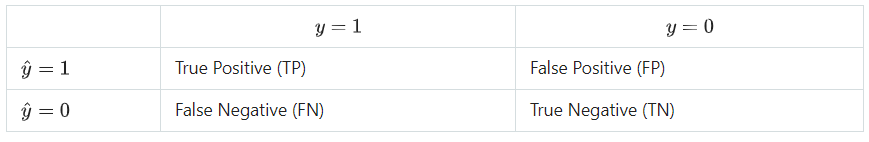

Здесь y^ — это ответ алгоритма на объекте, а y — истинная метка класса на этом объекте.

- TP — истино-положительное решение (класс 1 класифицирован как класс 1)
- TN — истино-отрицательное решение (класс 0 классифицирован как класс 0)
- FP — ложно-положительное решение (ошибка 1-го рода, ML-модель предсказала положительный результат 1, а на самом деле он отрицательный 0) - по сути это ложное срабатывание
- FN — ложно-отрицательное решение (ошибка 2-го рода – ML-модель предсказала отрицательный 0 результат, но на самом деле он положительный 1) - по сути это ложны пропуск

**Например:**
Есть больница и пациенты, наш классификатор определяет больной или нет.

Если наш классификатор определил что больной пациент здоровый - то это ложный пропус

Если наш классификатор определил что здоровой пациент больной - это ложное срабатывание

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test, answers_pred)

array([[139,  21],
       [ 54,  53]])

In [ ]:
df_y = pd.DataFrame(y_test)
df_y.value_counts()

,count
Survived,
0,160
1,107


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, answers_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 139
FP: 21
FN: 54
TP: 53


**Accuracy**

измеряет количество верно классифицированных объектов относительно общего количества всех объектов. Это доля правильных ответов.

Используя confusion matrix можно рассчитать accuracy следующим образом:


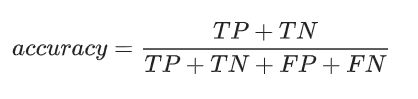

In [ ]:
accuracy_score(y_test, answers_pred)

0.7191011235955056

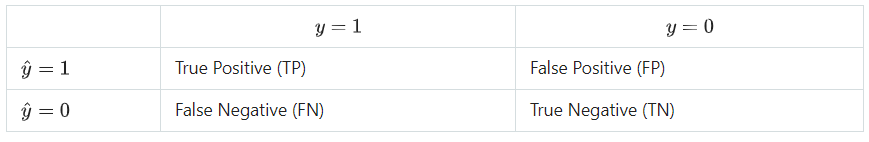

**Recall** (полнота)

Сколько объектов наша модель смогла правильно классифицировать с позитивной меткой из всего множества позитивных (т.е. как много объектов класса 1 находит наш классификатор).

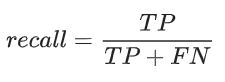

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
recall_score(y_test, answers_pred)

0.4953271028037383

**Precision** (точность)

Можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными. Насколько мы можем доверять нашему классификатору.

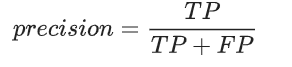

In [ ]:
precision_score(y_test, answers_pred)

0.7162162162162162

**Точность и полнота:**
- чем выше точность, тем меньше ложных срабатываний
- чем выше полнота, тем меньше ложных пропусков

**Метрики выбираются в зависимости от задачи**

1. Определение мошеннеческих операций на банковских счетах - важнее полнота (лучше лишний раз проверим)
2. Раздаеляем самолеты на свои и вражеские - важнее точность

**F1 score** (F мера)

Сочетание precision и recall, дает некоторый компромисс между ними двумя, оценка F1 достигает своего наилучшего значения в 1 и худшее в 0.

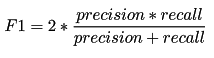

In [ ]:
f1_score(y_test, answers_pred)

0.585635359116022

Что еще почитать/посмотреть.

http://bazhenov.me/blog/2012/07/21/classification-performance-evaluation.html

http://blog.datalytica.ru/2018/05/blog-post.html

https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie/lecture/IVuAc/mietriki-kachiestva-klassifikatsii-1

https://habr.com/ru/company/ods/blog/328372/